EXPLORATORY DATA ANALYSIS USING LOGISTIC REGRESSION MODEL:

THE GIVEN DATA SET USED HERE IS  OF THE INFAMOUS DROWNED SHIP NAMED TITANIC.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

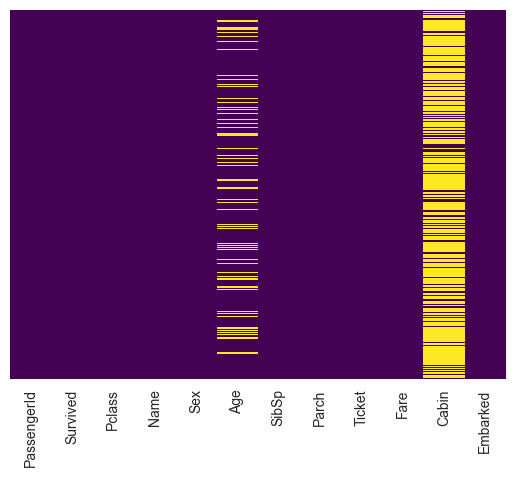

In [42]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

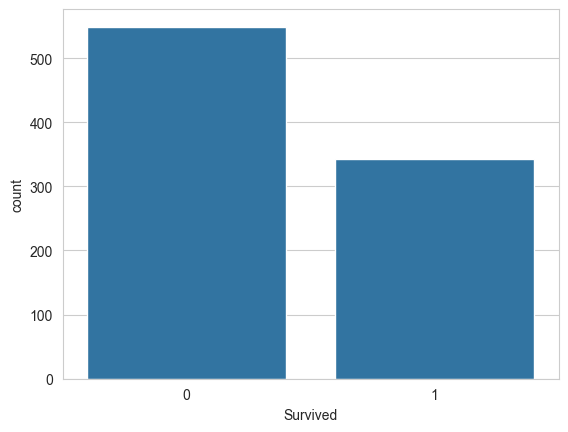

In [43]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', data = df)

<Axes: xlabel='Survived', ylabel='count'>

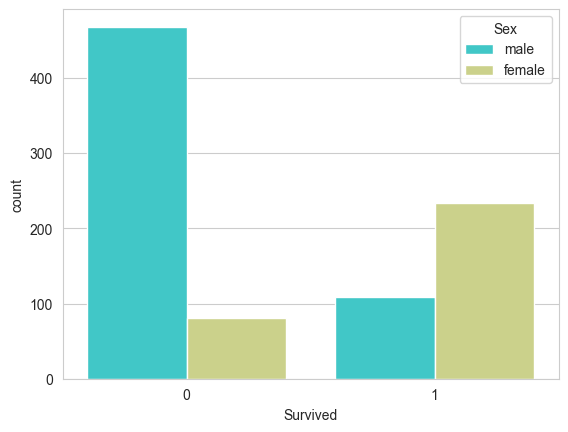

In [44]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue = 'Sex', data = df, palette = 'rainbow')

<Axes: xlabel='Survived', ylabel='count'>

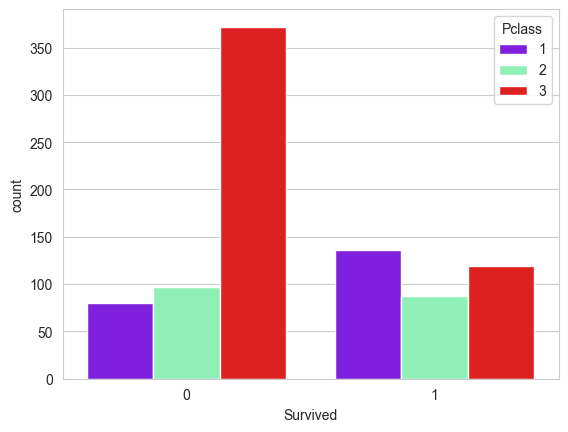

In [45]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue = 'Pclass',data = df, palette = 'rainbow')

C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\2153381739.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde = False, color = 'darkred' , bins = 40)


<Axes: xlabel='Age'>

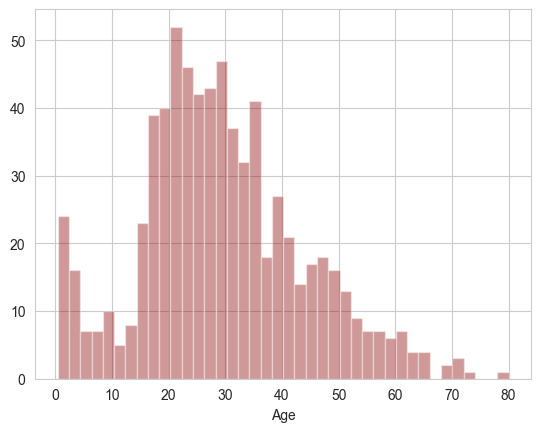

In [46]:
sns.distplot(df['Age'].dropna(), kde = False, color = 'darkred' , bins = 40)

<Axes: xlabel='SibSp', ylabel='count'>

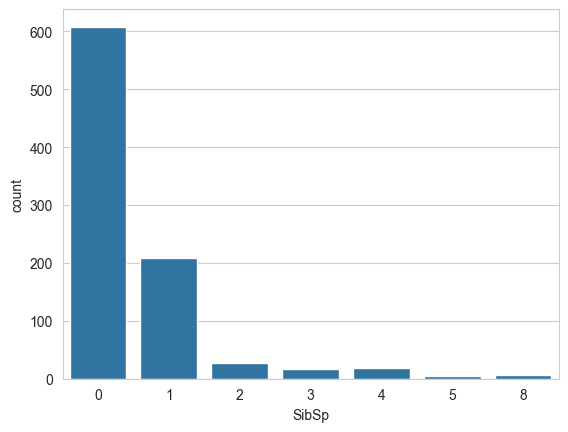

In [47]:
sns.countplot( x= 'SibSp' , data = df)

C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\3198976638.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df['Fare'],kde = False, color = 'darkred' , bins = 40)


<Axes: xlabel='Fare'>

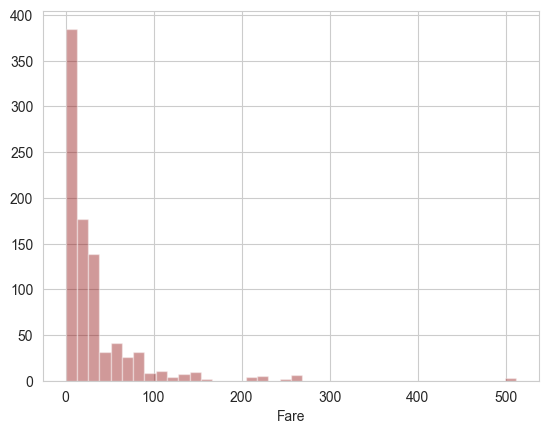

In [48]:
sns.distplot( df['Fare'],kde = False, color = 'darkred' , bins = 40)

C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\2101309290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Pclass' , y = 'Age', data = df, palette = 'rainbow')


<Axes: xlabel='Pclass', ylabel='Age'>

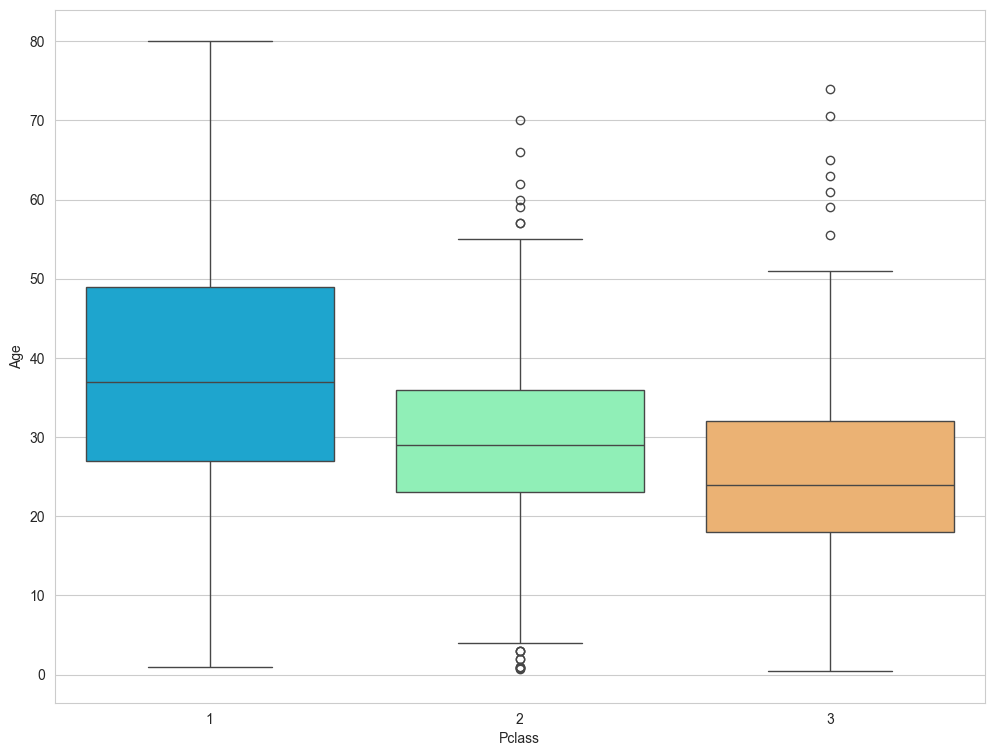

In [49]:
plt.figure(figsize = (12,9))
sns.boxplot(x= 'Pclass' , y = 'Age', data = df, palette = 'rainbow')

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [51]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)


C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\3878829440.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\3878829440.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\1359832245.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\1359832245.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

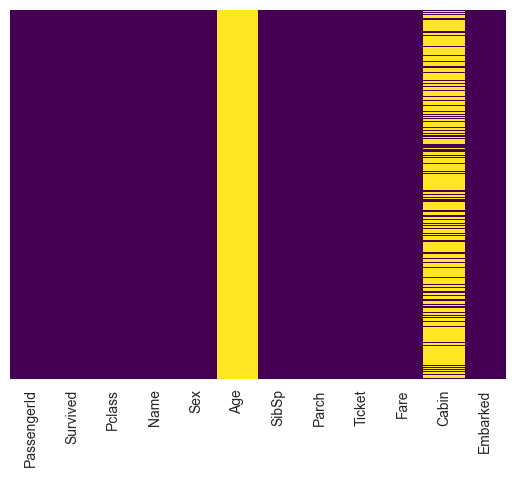

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
        else:
            return Age
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)

sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [53]:
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,None,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,S


C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\1359832245.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Ajay\AppData\Local\Temp\ipykernel_9168\1359832245.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

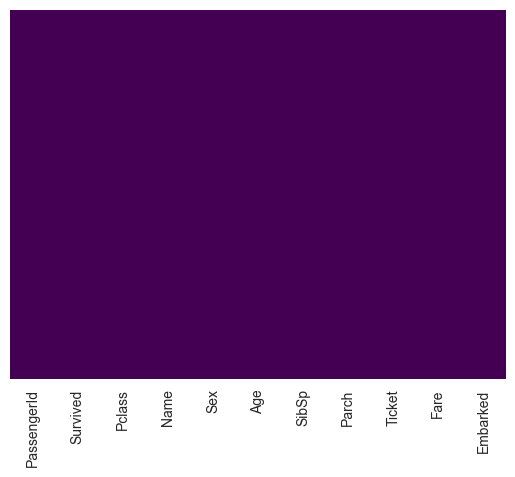

In [54]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
        else:
            return Age
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)

sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [55]:
pd.get_dummies(df['Embarked'],drop_first = True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [56]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)
sex = pd.get_dummies(df['Sex'], drop_first = True)

In [57]:
df.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [58]:
df = pd.concat([df,sex,embark], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,True,False,True
1,2,1,1,37,1,0,71.2833,False,False,False
2,3,1,3,24,0,0,7.9250,False,False,True
3,4,1,1,37,1,0,53.1000,False,False,True
4,5,0,3,24,0,0,8.0500,True,False,True


In [59]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,True,False,True
1,2,1,1,37,1,0,71.2833,False,False,False
2,3,1,3,24,0,0,7.9250,False,False,True
3,4,1,1,37,1,0,53.1000,False,False,True
4,5,0,3,24,0,0,8.0500,True,False,True


In [60]:
# BUILDING A LOGISTIC REGRESSION MODEL
df.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,24,1,0,7.2500,True,False,True
1,2,1,37,1,0,71.2833,False,False,False
2,3,3,24,0,0,7.9250,False,False,True
3,4,1,37,1,0,53.1000,False,False,True
4,5,3,24,0,0,8.0500,True,False,True


In [61]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
pip install  -U scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1),
                                                    df['Survived'], test_size = 0.30,
                                                    random_state = 101)

In [67]:
# training and prediction
from sklearn.linear_model import LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\Ajay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
accuracy = confusion_matrix(y_test,predictions)

In [72]:
accuracy

array([[134,  20],
       [ 40,  74]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7761194029850746